In [1]:
import numpy as np
import random
from tools import *
from qiskit import QuantumCircuit, Aer, execute

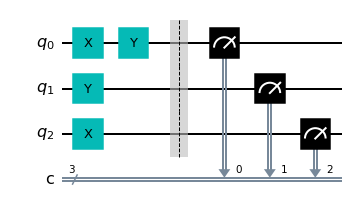

In [2]:
qc = QuantumCircuit(3,3)
for i in range(0,int(random.randint(1,5))):
    g = random.choice(("hadamard","x","y","z","cnot"))
    if g == "cnot":
        q = random.sample(tuple(range(0,3)),2)
        add_gate(qc,gate=g,channel=q[0],channel_op=q[1])
    else:
        q = random.choice(tuple(range(0,3)))
        add_gate(qc,gate=g,channel=q)
 
qc.barrier()
qc.measure([0,1,2],[0,1,2])
qc.draw('mpl')
    
    

In [3]:
simulator = Aer.get_backend('qasm_simulator')
measuring(qc, backend=simulator)

{'110': 100.0}

In [4]:
x = randomQuantumState()
print(x)

NameError: name 'random' is not defined